# Exam Modul 3

A. EDA (25 poin)

Batasan Data untuk Ujian

Ukuran data yang digunakan adalah 5000 baris (rows) awal [:5000].

Variabel yang dipakai berjumlah 16 kolom, yaitu: ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

Jalankan Exploratory Data Analysis untuk:

- Memahami profil tamu/konsumen hotel (customer profiling).
- Memahami kebiasaan tamu/konsumen hotel (customer behavior).
- Berikan penjelasan tentang insight yang Anda temukan dari hasil Exploratory Data Analysis ke manajemen hotel!

In [221]:
# import libararies
import numpy as np
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# PREPROCESSING
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV  

# Model machine learninng
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, f1_score, recall_score, precision_score

In [222]:
# load dataset
df = pd.read_csv('hotel_bookings.csv')

# ambil 5000 data pertama dan 16 kolom yg dipilih
df = df.loc[0:4999,['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]

df

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


# A. EDA (25 poin)

In [223]:
# deskripsi statistik 
df.describe(include='all')

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000,4998,5000,5000,5000,5000.000000,5000,5000.000000,5000,5000.000000,5000.000000
unique,1,NaN,NaN,NaN,NaN,5,56,6,3,9,NaN,3,NaN,4,NaN,NaN
top,Resort Hotel,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,A,NaN,No Deposit,NaN,Transient,NaN,NaN
freq,5000,NaN,NaN,NaN,NaN,3418,3174,2156,3657,3167,NaN,4461,NaN,3699,NaN,NaN
mean,NaN,0.459600,1.969800,0.115600,0.014800,NaN,NaN,NaN,NaN,NaN,0.207200,NaN,1.772000,NaN,0.093800,0.602000
std,NaN,0.498415,1.566326,0.444833,0.122409,NaN,NaN,NaN,NaN,NaN,0.612489,NaN,13.545358,NaN,0.292948,0.823245
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
50%,NaN,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
75%,NaN,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,1.000000


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

In [225]:
df['hotel'].value_counts()

Resort Hotel    5000
Name: hotel, dtype: int64

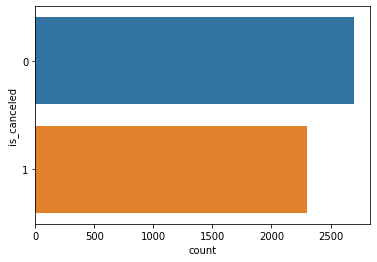

In [226]:
sns.countplot(y='is_canceled', data=df)
# is_canceled akan berperan sebagai label
# yang melakukan cancel (1) lebih sedikit dari yang tidak (0) 

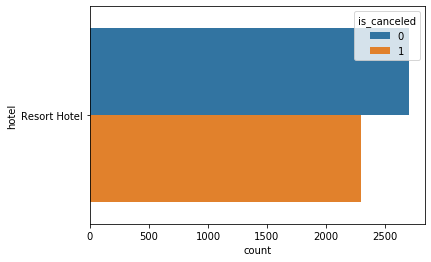

In [227]:
sns.countplot(y='hotel', data=df, hue='is_canceled')
# feature hotel hanya punya 1 category

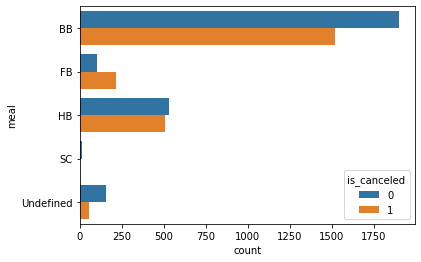

In [228]:
sns.countplot(y='meal', data=df, hue='is_canceled')
# pengunjung keabnyakan memesan makanan BB, dan paling sedikit SC
# hotel bisa menyediakan stock BB lebih banyak
# pada meal FB, pengunjung yang cancel lebih banyak 

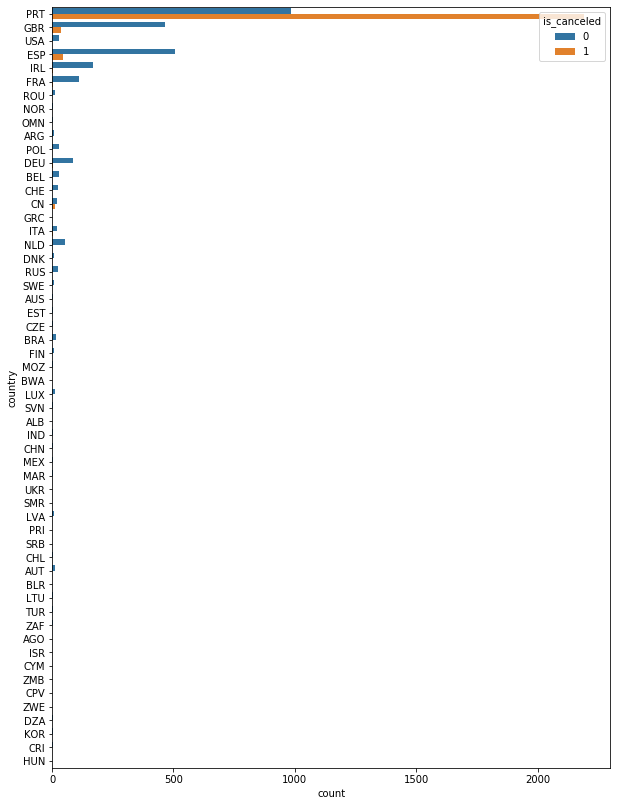

In [229]:
plt.figure(figsize=(10,14))
sns.countplot(y='country', data=df, hue='is_canceled')

# pengunjung asal PRT paling banyak melakukan booking, dan yang cancel lebih banyak dari yang tidak
# hotel bisa mencari tahu penyebab mengapa pengunjung asal PRT sangat banyak yang cancel

# diikuti oleh pengunjung asal ESP dan GBR, namun mayoritas mereka jadi menginap (tidak cancel) 
# hotel bisa melakukan marketing lebih giat pada negara loyal seperti ESP, GBR, IRL, FRA

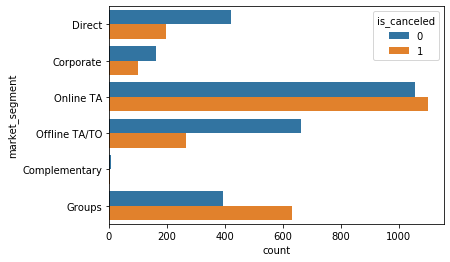

In [230]:
sns.countplot(y='market_segment', data=df, hue='is_canceled')
# booking paling banyak dilakukan melalui Online TA (Travel Agent), namun yang cancel lebih banyak dari yang tidak
# hotel bisa melakukan marketing secara digital/internet marketing karena peluangnya sangat besar
# hotel bisa evalusi kenapa pada Online TA dan Groups banyak yg cancel

# booking paling sedikit dari Complementary

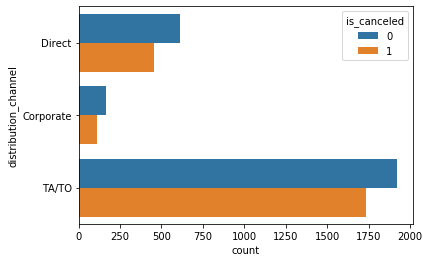

In [231]:
sns.countplot(y='distribution_channel', data=df, hue='is_canceled')
# Booking paling banyak dilakukan melalui travel agent atau tour group
# Paling banyak cancel juga dari TA/TO

# Hotel bisa memberi sale pada corporate, karena bisa menjangkau market yang lebih luas (karyawannya banyak)

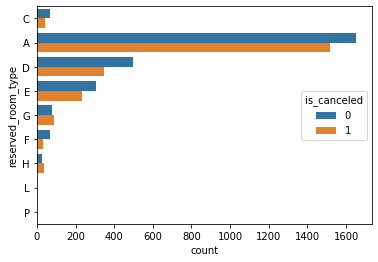

In [232]:
sns.countplot(y='reserved_room_type', data=df, hue='is_canceled')
# paling banyak pengunjung memesan tipe kamar A
# ada kecenderungan cancel booking lebih besar pada type kamr G dan H 

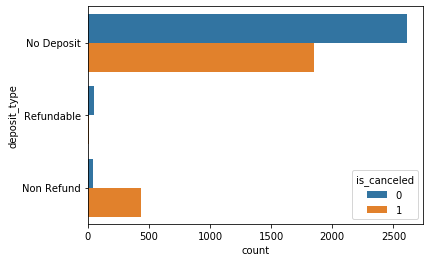

In [233]:
sns.countplot(y='deposit_type', data=df, hue='is_canceled')
# paling banyak pengunjung tidak melakukan deposit 
# Non_Refund malah banyak yang melakukan cancel

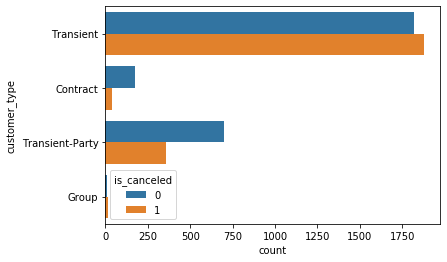

In [234]:
sns.countplot(y='customer_type', data=df, hue='is_canceled')
# paling banyak pengunjung Trancient, juga lebih banyak yang cancel dari pada yang tidak
# paling sedikit dari tipe Group

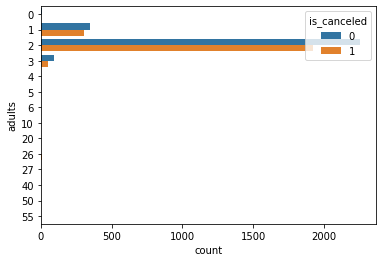

In [235]:
sns.countplot(y='adults', hue='is_canceled', data=df)
# paling banyak pengunjung dengan jumlah orang dewasa 2 orang, kemungkinan pasangan
# proporsi yang cancel dan tidak cancel hampir sama pada setiap category jumlah orang dewasa

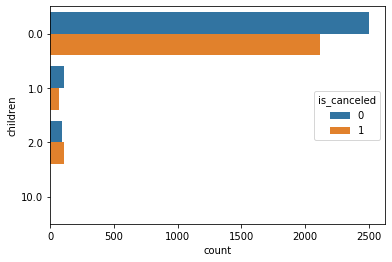

In [236]:
sns.countplot(y='children', hue='is_canceled', data=df)
# Paling banyak pengunjung tidak membawa anak kecil
# Pengunjung dengan 2 anak kecil, kemungkinan cancelnya lebih besar daripada tidak cancel. Ini bisa jadi karena yang berkeluarga lebih memingkinkan mengubah rencana karena anggota keluarga lebih banyak

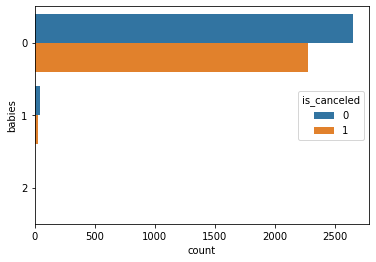

In [237]:
sns.countplot(y='babies', hue='is_canceled', data=df)
# Pengunjung jarang yang membawa bayi

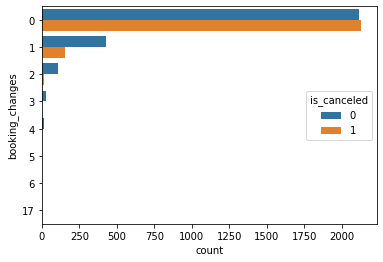

In [238]:
sns.countplot(y='booking_changes', hue='is_canceled', data=df)
# Pengunjung paling banyak yang tidak melakukan booking change
# Pengunjung yang melakukan booking change kemungkinan cancelnya lebih sedikit

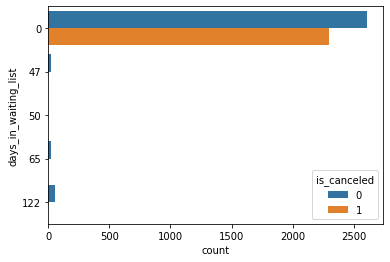

In [239]:
sns.countplot(y='days_in_waiting_list', hue='is_canceled', data=df)
# Pengunjung paling banyak tidak dalam waiting list
# Pengunjung yang masuk waiting list cenderung tidak cancel

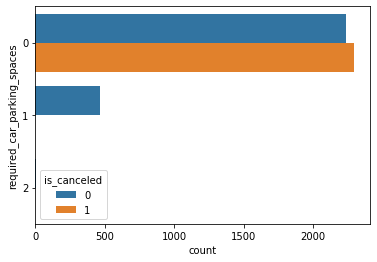

In [240]:
sns.countplot(y='required_car_parking_spaces', hue='is_canceled', data=df)
# Pengunjung kebanyakan tidak meminta tempat parkir
# Pengunjung yang meminta tempat parkir cenderung tidak cancel

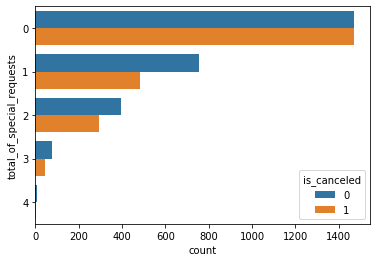

In [241]:
sns.countplot(y='total_of_special_requests', hue='is_canceled', data=df)
# Pengunjung kebanyakan tidak meminta special request
# Pengungjung yang meminta special request kemungkinan cancelnya lebih kecil

## Kesimpulan EDA

Dari EDA di atas, ada beberapa feature menonjol yang menggambarkan kecenderungan pengunjung yang booking hotel akan cancel atau jadi menginap:

Ciri-ciri pengunjung yang cenderung cancel:
>- memesan meal FB 
>- bearasal dari negara PRT
>- dari market segment Groups

Dengan mengetahui ciri pengunjung yang cenderung cancelnya lebih besar, hotel bisa menantisipasi. Selain itu juga hotel bisa melakukan evaluasi dan perbaikan fasilitas/pelayanan/potongan harga agar pengunjung dengan ciri ini tidak mudah melakukan cancel   

Ciri-ciri pengunjung yang cenderung tidak cancel (jadi menginap):
>- bearasal dari negara ESP, GBR, IRL, FRA
>- tipe customer Trancient-Party
>- melakukan booking change >=1 perubahan
>- termasuk dalam waiting list
>- meminta tempat parkir (1 slot)
>- mempunyai 1 special request

Dengan mengetahui ciri pengunjung yang cenderung jadi menginapnya lebih besar, hotel bisa menyiapkan fasilitas dan pelayanan lebih baik. Hotel bisa melakukan pemasaran pada calon pengunjung dengan ciri-ciri seperti di atas

# B. Data Cleaning & Preprocessing (15 poin)

B. Data Cleaning & Preprocessing (15 poin)

Jelaskan tahapan dan alasan untuk setiap langkah preprocessing yang Anda lakukan.

Buatlah kode untuk preprocessing yang Anda lakukan dengan Pipeline, jika diperlukan, dan ColumnTransformer. Simpan kode tersebut di dalam variable transformer.

In [283]:
# load dataset
df = pd.read_csv('hotel_bookings.csv')

# ambil 5000 data pertama dan 16 kolom yg dipilih
df = df.loc[0:4999,['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]

df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

1. Terdapat missing value pada feature country
> diisi dengan simple imputer most_frequent karena datanya categorical

2. Drop column hotel, karena hanya memiliki 1 category

3. Encoding:
>- hotel: onehot (tidak berpengaruh karena hanya 1 category)
>- meal: onehot
>- country: binary
>- market_segment: onehot
>- distribution_channel:onehot
>- reserved_room_type: binary
>- deposit_type: onehot
>- customer_type: onehot

- Dilakukan OneHot encoding karena datanya nominal dan jumlah category dalam featurenya sedikit
- Dilakukan Binary encoding karena datanya nominal dan jumlah category dalam featurenya banyak

4. Imbalance dataset:
>- memilih antara undersampling atau oversampling (dengan grid search)


In [285]:
# Encoding

# melakukan impute modus dan binary encoding, untuk feature country
binary_fill = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary', ce.BinaryEncoder())
])

# column transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['hotel', 'meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']),
    ('binary_fill', binary_fill, ['country']),
    ('binary', ce.BinaryEncoder(),['reserved_room_type'])
], remainder='passthrough')

In [286]:
# Split dataset
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=2020
)

# C. Model Benchmark & Evaluation Metric (40 poin)


## Metric evaluation

Metric evaluation yang digunakan adalah f1 score, dengan alasan ingin menekan False Negative dan False Positive. Atau dengan kata lain:

>- Jangan sampai yg kenyataannya cancel tapi diprediksi tidak cancel (FN), karena akan merugikan hotel yg sudah terlanjur menolak pengunjung lain pada tanggal yg sama, sudah menyiapkan fasilitas, penjemputan, dll.
>- Jangan sampai yg diprediksi cancel tapi kenyataannya jadi mennginap (FP), karena hotel akan kurang persiapan 

## Model:

1. Logistic Regression
> model logistic regression akan membentuk garis regresi dengan bentuk kurva S, hasilnya hanya akan ada 2 pilihan, kelas 0 dan kelas 2 

2. KNN
> cara kerjanya adalah dengan menghitung jumlah atau jarak dengan data point lainnya yang terdekat (nearest neighbors) 

3. Decision Tree 
> cara kerja Decision Tree adalah dengan membentuk seperti cabang pohon dengan tujuan mem-break down proses pengambilan keputusan yang kompleks menjadi lebih simple, sehingga pengambil keputusan akan lebih menginterpretasikan solusi dari permasalahan.

4. Random Forest
> Random Forest basisnya adalah Decision Tree. Klasifikasi random forest dilakukan melalui penggabungan pohon (tree) dengan melakukan training pada sampel data yang dimiliki. Penentuan klasifikasi dengan random forest diambil berdasarkan hasil voting dari tree yang terbentuk.

In [287]:
# kandidat model yang akan digunakan dalam modeling
models = [
    ['Log Regression', LogisticRegression()],
    ['KNN', KNeighborsClassifier()],
    ['Decision Tree', DecisionTreeClassifier()],
    ['Random Forest', RandomForestClassifier()]
]

In [288]:
# membuat function untuk melihat score f1 terbaik dari setiap model
def evaluate(models):
    model_name=[]
    f1_score=[]
    f1_std=[]

    for name, model in models:
        # model yang sudah melalui transformasi
        estimator = Pipeline([
            ('preprocess',transformer),
            ('model', model)
        ])

        # cross validation
        skfold = StratifiedKFold(n_splits=5)

        # menampilkan rata-rata f1 score setiap model
        model_name.append(name)
        f1_score.append(cross_val_score(
            estimator, 
            X_train,y_train,
            cv=skfold,
            scoring='f1').mean()
            )

        # menampilkan standar deviasi f1 score setiap model
        f1_std.append(cross_val_score(
            estimator, 
            X_train,y_train,
            cv=skfold,
            scoring='f1').std()
            )

    return pd.DataFrame({
        'model': model_name,
        'f1_score': f1_score,
        'f1_std': f1_std
    })

# menampilkan f1 score 
evaluate(models)

,model,f1_score,f1_std
0,Log Regression,0.853498,0.008178
1,KNN,0.829140,0.014906
2,Decision Tree,0.853747,0.010086
3,Random Forest,0.856357,0.009719


In [289]:
# Berdasarkan f1 score mean terbesar dan model paling stabil (f1 score std kecil), ada 3 model dengan score berdekatan yaitu:
# - Log Regression
# - Decision Tree
# - Random Forest

# jadi akan dicek satu persatu, model mana yg paling stabil

In [290]:
# preproces dan model terpilih
estimator = Pipeline([
    ('preprocess',transformer),
    ('model', LogisticRegression())
])

# fit
estimator.fit(X_train, y_train)

# f1_score (y_test, y_predict)
f1_score(y_test, estimator.predict(X_test))

0.8381909547738693

In [291]:
# preproces dan model terpilih
estimator = Pipeline([
    ('preprocess',transformer),
    ('model', DecisionTreeClassifier())
])

# fit
estimator.fit(X_train, y_train)

# f1_score (y_test, y_predict)
f1_score(y_test, estimator.predict(X_test))

0.8454258675078865

In [292]:
# preproces dan model terpilih
estimator = Pipeline([
    ('preprocess',transformer),
    ('model', RandomForestClassifier())
])

# fit
estimator.fit(X_train, y_train)

# f1_score (y_test, y_predict)
f1_RF = f1_score(y_test, estimator.predict(X_test))
f1_RF

0.8521199586349535

### Random Forest paling besar f1 scorenya, dan paling stabil

- Selanjutnya akan dilakukan percobaan dengan balancing terhadap data, karena datanya imbalance
- Tidak dilakukan scaling karena model yang terpilih adalah Random Forest 

## Balancing

In [293]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

In [294]:
# model dengan balancing
smote = SMOTE()
model = RandomForestClassifier()

# model
estimator_balance = Pipeline([
    ('preprocess', transformer),
    ('balancing', smote),
    ('model', model)
])

# fit 
estimator_balance.fit(X_train, y_train)

# recall_score
f1_score(y_test, estimator_balance.predict(X_test))

0.8535825545171339

In [295]:
# model dengan balancing
nearmiss = NearMiss()
model = RandomForestClassifier()

# model
estimator_balance = Pipeline([
    ('preprocess', transformer),
    ('balancing', nearmiss),
    ('model', model)
])

# fit 
estimator_balance.fit(X_train, y_train)

# recall_score
f1_score(y_test, estimator_balance.predict(X_test))

0.8459152016546019

In [296]:
# mencari metode balancing terbaik
smote = SMOTE()
nearmiss = NearMiss()

hyperparam_balancing = {
    'balancing':[smote, nearmiss, None]
}

# cross validation
skfold = StratifiedKFold(n_splits=5)

# grid search
grid_balacing = GridSearchCV(
    estimator = estimator_balance,
    param_grid = hyperparam_balancing,
    cv = skfold,
    scoring = 'f1',
    n_jobs = -1
)

grid_balacing.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['hotel',
                                                                          'meal',
                                                                          'market_segment',
                                                                          'distribution_channel',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                                             

In [297]:
grid_balacing.best_params_
# metode SMOTE() terpilih sebagai metode terbaik di sini 
# catatan:(walaupun kalau dirunning ulang terkadang berubah menjadi None/tanpa balancing)


{'balancing': SMOTE()}

# D. Hyper-parameter Tuning (20 poin)

## Model dengan balancing SMOTE


In [301]:
# Alternatif 2: model dengan balancing SMOTE

# Parameter
hyperparam_space = {
    # jumlah neighbors terdekat untuk balancing SMOTE
    'balancing__k_neighbors' : [2,5,10,15,20],
       
    # jumlah minimum data poin pada suatu node sebelum node tsb displit
    'model__min_samples_leaf' : [1,5,10,15,20,50],
    
    # jumlah minimum data poin yg diizinkan pada suatu leaf node
    'model__min_samples_split' : [2,5,10,15,20,50],
    
    # maximum tingkat cabang pohon pada random forest
    'model__max_depth' : [2,3,4,5,6,7],
    
    # fungsi untuk menghitung kualitas split
    'model__criterion' : ['entropy','gini']
}

# model dengan balancing SMOTE
estimator_balance = Pipeline([
    ('preprocess', transformer),
    ('balancing', smote),
    ('model', model)
])

# cross validation
skfold = StratifiedKFold(n_splits=5)

In [302]:
# Tuning Alternatif 2: model dengan balancing SMOTE

# randomsearch karena keterbatasan waktu dan device
random = RandomizedSearchCV(
    estimator=estimator_balance,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1
)

# fit randomized serch
random.fit(X_train, y_train)

# parameter terbaik
random.best_params_

{'model__min_samples_split': 50,
 'model__min_samples_leaf': 5,
 'model__max_depth': 7,
 'model__criterion': 'entropy',
 'balancing__k_neighbors': 15}

In [303]:
# fit model terpilih oleh random search
random.best_estimator_.fit(X_train, y_train)

# f1 score setelah Hyperparameter Tuning
f1_hyper_balanced = f1_score(y_test, random.best_estimator_.predict(X_test))
f1_hyper_balanced

0.8551859099804305

# Kesimpulan

Model terbaik untuk dataset ini adalah Random Forest, dengan balancing SMOTE dan hyperparameter tuning, walaupun angkanya tidak terlalu jauh

f1 score benchmark:
> 0.8521199586349535

f1 score hyperparameter tuning dgn SMOTE:
> 0.8551859099804305